# Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['font.size'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
import matplotlib.pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
import gleam
from gleam.multilens import MultiLens
from gleam.utils.lensing import LensModel
from gleam.reconsrc import ReconSrc
from gleam.lightsampler import LightSampler
from gleam.starsampler import StarSampler
from gleam.utils.plotting import kappa_map_plot, kappa_profiles_plot
from gleam.utils.plotting import arrival_time_surface_plot
from gleam.utils.plotting import plot_scalebar, plot_labelbox
from gleam.utils.rgb_map import lupton_like, stellar_fraction_map, stellar_fraction_cbar
import gleam.utils.units as glu
import gleam.utils.colors as gcl

In [2]:
extension = 'pdf'


# Lens observations

In [3]:
lensfiles = !ls data/*.fits
key_sorter = {'U': 0, 'G': 1, 'R': 2, 'I': 3, 'I2': 4, 'Z': 5}
lensfiles = sorted(lensfiles, key=lambda f: key_sorter[f.split('.')[1]])
print(lensfiles)

wide_lensfiles = !ls data/wide/*.fits
wide_lensfiles =sorted(wide_lensfiles, key=lambda f: key_sorter[f.split('.')[1]])
print(wide_lensfiles)


['data/W3+3-2.U.12909_13036_7445_7572.fits', 'data/W3+3-2.G.12909_13036_7445_7572.fits', 'data/W3+3-2.R.12909_13036_7445_7572.fits', 'data/W3+3-2.I.12909_13036_7445_7572.fits', 'data/W3+3-2.I2.12909_13036_7445_7572.fits', 'data/W3+3-2.Z.12909_13036_7445_7572.fits']
['data/wide/W3+3-2.U.12305_13640_6841_8176.fits', 'data/wide/W3+3-2.G.12305_13640_6841_8176.fits', 'data/wide/W3+3-2.R.12305_13640_6841_8176.fits', 'data/wide/W3+3-2.I.12305_13640_6841_8176.fits', 'data/wide/W3+3-2.I2.12305_13640_6841_8176.fits', 'data/wide/W3+3-2.Z.12305_13640_6841_8176.fits']


In [4]:
ml = MultiLens(lensfiles)
print(ml.__v__)


N                   	6
filepaths           	['/Users/phdenzel/sw05/data/W3+3-2.U.12909_13036_7445_7572.fits', '/Users/phdenzel/sw05/data/W3+3-2.G.12909_13036_7445_7572.fits', '/Users/phdenzel/sw05/data/W3+3-2.R.12909_13036_7445_7572.fits', '/Users/phdenzel/sw05/data/W3+3-2.I.12909_13036_7445_7572.fits', '/Users/phdenzel/sw05/data/W3+3-2.I2.12909_13036_7445_7572.fits', '/Users/phdenzel/sw05/data/W3+3-2.Z.12909_13036_7445_7572.fits']
files               	['W3+3-2.U.12909_13036_7445_7572.fits', 'W3+3-2.G.12909_13036_7445_7572.fits', 'W3+3-2.R.12909_13036_7445_7572.fits', 'W3+3-2.I.12909_13036_7445_7572.fits', 'W3+3-2.I2.12909_13036_7445_7572.fits', 'W3+3-2.Z.12909_13036_7445_7572.fits']
fs                  	[LensObject(u@[218.7258, 52.4808]), LensObject(g@[218.7258, 52.4808]), LensObject(r@[218.7258, 52.4808]), LensObject(i@[218.7258, 52.4808]), LensObject(i@[218.7258, 52.4808]), LensObject(z@[218.7258, 52.4808])]
bands               	['u', 'g', 'r', 'i', 'i', 'z']
naxis1              	[1

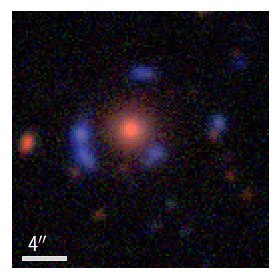

In [5]:
fig, ax = plt.subplots()
ml.plot_composite(fig, ax, method='bluer', scalebar=True, length=4, fontsize=22)
plt.tight_layout()

savename = 'composite_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)


In [6]:
mlw = MultiLens(wide_lensfiles)
print(mlw.__v__)


N                   	6
filepaths           	['/Users/phdenzel/sw05/data/wide/W3+3-2.U.12305_13640_6841_8176.fits', '/Users/phdenzel/sw05/data/wide/W3+3-2.G.12305_13640_6841_8176.fits', '/Users/phdenzel/sw05/data/wide/W3+3-2.R.12305_13640_6841_8176.fits', '/Users/phdenzel/sw05/data/wide/W3+3-2.I.12305_13640_6841_8176.fits', '/Users/phdenzel/sw05/data/wide/W3+3-2.I2.12305_13640_6841_8176.fits', '/Users/phdenzel/sw05/data/wide/W3+3-2.Z.12305_13640_6841_8176.fits']
files               	['W3+3-2.U.12305_13640_6841_8176.fits', 'W3+3-2.G.12305_13640_6841_8176.fits', 'W3+3-2.R.12305_13640_6841_8176.fits', 'W3+3-2.I.12305_13640_6841_8176.fits', 'W3+3-2.I2.12305_13640_6841_8176.fits', 'W3+3-2.Z.12305_13640_6841_8176.fits']
fs                  	[LensObject(u@[218.7258, 52.4808]), LensObject(g@[218.7258, 52.4808]), LensObject(r@[218.7258, 52.4808]), LensObject(i@[218.7258, 52.4808]), LensObject(i@[218.7258, 52.4808]), LensObject(z@[218.7258, 52.4808])]
bands               	['u', 'g', 'r', 'i', 'i'

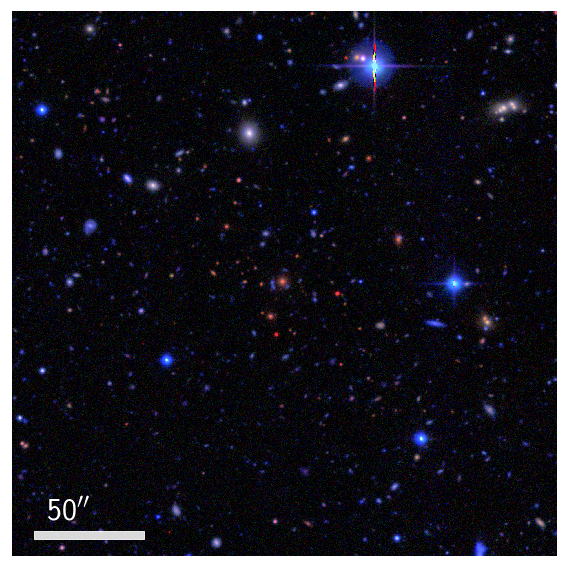

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
mlw.plot_composite(fig, ax, method='bluer', scalebar=True, length=50, fontsize=32)
plt.tight_layout()

savename = 'nbrhood_composite.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)


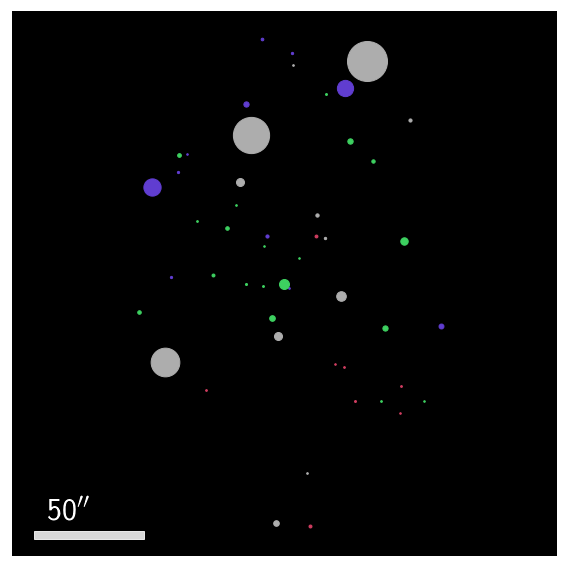

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

mref = 19.051
zref = 0.5629
xref = -218.72702
yref = 52.480804

nbrfyle = open('data/wide/nearby.out')

ax.imshow(np.ones((248, 248)), extent=[-124, 124, -124, 124], cmap='bone')
# plt.colorbar()

lynes = nbrfyle.readlines()
for lyne in lynes:
    g = lyne.split()
    x, y = -float(g[0]), float(g[1])
    y = (y - yref) * 3600
    x = (x - xref) * 3600 / 1.6
    mdiff = mref - float(g[3])
    size = 10**(0.3*(mdiff))
    z = float(g[5])
    if size > 10**(-0.8):
        if size > 4:
            size = 4
        size = int(400 * size**2)
        # print x, y, siz, z, mdiff
        if z <= 0:
            ax.scatter(x, y, marker='.', s=size, color='#adadad')  # grey
        elif z > (zref + 0.1):
            ax.scatter(x, y, marker='.', s=size, color='#d03d60')  # red
        elif z < (zref - 0.1):
            ax.scatter(x, y, marker='.', s=size, color='#603dd0')  # blue
        else:
            ax.scatter(x, y, marker='.', s=size, color='#3dd060')  # green


ax.set_xlim(xmin=-124, xmax=124)
ax.set_ylim(ymin=-124, ymax=124)
plot_scalebar(124, length=50, fontsize=32)
plt.axis('off')
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.gca().set_aspect('equal')
plt.tight_layout()

savename = 'nbrhood_zrange.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)


# Lens models

In [9]:
statefile = 'gls/012771.state'
# statefile = 'gls/N7LTELSYTM.state'
# statefile = 'gls/sw05.state'
print(statefile)


gls/012771.state


In [10]:
lm = LensModel(statefile)
print(lm.__v__)


filename            	012771.state
filepath            	gls/012771.state
N                   	200
pixrad              	12
maprad              	8.52937665444
pixel_size          	0.227450044118
kappa               	55659503266.0
minima              	[[ 1.347  5.29 ]
 [-4.249 -2.3  ]]
saddle_points       	[[-4.68  -0.238]
 [ 2.472 -2.252]]
maxima              	[]
zl                  	0.66
zs                  	3.0
N_obj               	1
N_src               	1
obj_idx             	0
src_idx             	0


## $\kappa$

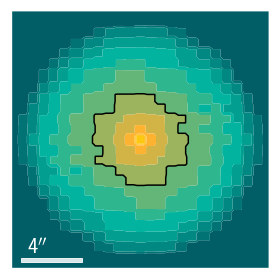

In [11]:
kappa_map_plot(lm,
               mdl_index=-1,
               extent=lm.extent,
               factor=lm.dlsds,
               contours=True,
               levels=8,
               delta=0.1)

plot_scalebar(lm.maprad,
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'kappa_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)


## $\kappa_{\infty}$

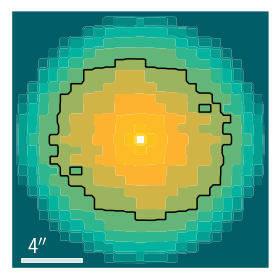

In [12]:
kappa_map_plot(lm,
               mdl_index=-1,
               extent=lm.extent,
               factor=1.,
               contours=True,
               levels=8,
               delta=0.1)

plot_scalebar(lm.maprad,
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'kappa_inf_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)


## $\Sigma$

In [53]:
k_grid = lm.kappa_grid(model_index=-1, refined=False)
kappa = lm.kappa  # Msol/arcsec^2
plt.imshow(kappa*k_grid, extent=lm.extent, cmap=gcl.GLEAMcmaps.agaveglitch, vmin=0.1*kappa, vmax=2*kappa)
plt.colorbar()

plot_scalebar(lm.maprad,
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)

# plt.tight_layout()
# savename = 'sigma_SW05.{}'.format(extension)
# plt.savefig(os.path.join('plots', savename),
#             transparent=True, bbox_inches='tight', pad_inches=0)
plt.close()


## $\tau$

In [54]:
%%script false
arrival_time_surface_plot(lm,
                          psifactor=1./lm.dlsds,
                          geofactor=1./lm.dlsds,
                          # psifactor=1.,
                          # geofactor=1.,
                          mdl_index=-1,
                          draw_images=True,
                          contours=True,
                          levels=75,
                          scalebar=False)

plot_scalebar(lm.maprad,
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='black',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='black')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)

# plt.tight_layout()
# savename = 'arrival_SW05.{}'.format(extension)
# plt.savefig(os.path.join('plots', savename),
#             transparent=True, bbox_inches='tight', pad_inches=0)


## Calculation of synthetics

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.image.AxesImage at 0x7f8d6bfd5090>])

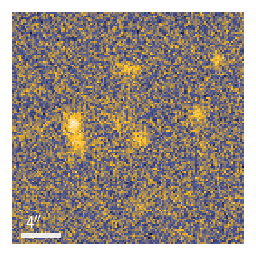

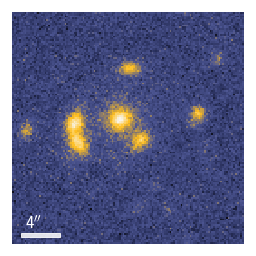

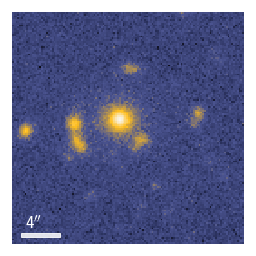

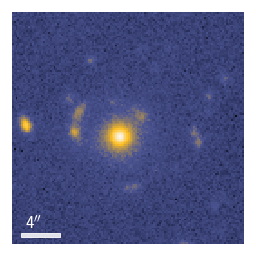

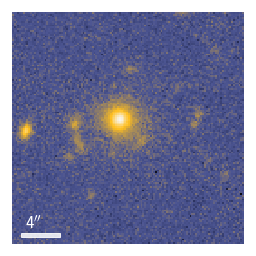

In [55]:
for b in ml.bands:
    ml[b].zl = lm.zl
    ml[b].zs = lm.zs
# Inspect all bands
ml['u'].plot_f(log=True, length=4)   # u
ml['g'].plot_f(log=True, length=4)   # g
ml['r'].plot_f(log=True, length=4)   # r
ml['i'].plot_f(log=True, length=4)   # i
ml['z'].plot_f(log=True, length=4)   # z


In [56]:
# band selection
band = 'i'
lo = ml[band].deepcopy()
lo.data = np.flipud(lo.data[:])

print lo.__v__


filename            	W3+3-2.I.12909_13036_7445_7572.fits
filepath            	/Users/phdenzel/sw05/data/W3+3-2.I.12909_13036_7445_7572.fits
band                	i
naxis1              	128
naxis2              	128
naxis_plus          	None
refval              	[218.9618304, 52.64492319]
refpx               	[-2712.0, 3246.0]
center              	<218.7258, 52.4808>
px2deg              	[5.159260763e-05, 5.159260763e-05]
px2arcsec           	[0.185733387468, 0.185733387468]
megacam_range       	[(12909.0, 13036.0), (7445.0, 7572.0)]
field               	W3+3-2
photzp              	30.0
mag_formula         	<function mag_formula at 0x7f8d6c9082a8>
roi                 	ROISelector(128, 128)
lens                	None
srcimgs             	[]
zl                  	0.66
zs                  	3.0
mapr                	11.8869
tdelay              	None
tderr               	None
light_model         	{'sersic': <gleam.model.sersic.Sersic object at 0x7f8d6ed6ce50>}
stel_mass           	3.04e+11
glscfa

In [17]:
# mask centering
c = lo.center.xy[::-1] + np.array([-4, -5])
msk = lo.roi.select_circle(center=c, radius=13)
lo.origin = c

print(c)

[60.00000000002137 59.00000000000591]


In [18]:
# ReconSrc setup
reconsrc = ReconSrc(lo, lm, M=120, mask_keys=['circle'])

sigf = 1
sig2 = sigf * np.abs(lo.data[:])
sig2[sig2 == 0] = sig2[sig2 != 0].min()

print reconsrc.__v__


lensobject          	LensObject(i@[218.7258, 52.4808])
model               	<LensModel@012771>
mask_keys           	['circle']
M                   	120
N                   	241
r_max               	None
M_fullres           	256
N_fullres           	513
r_fullres           	None
N_nil               	0
rotation            	0


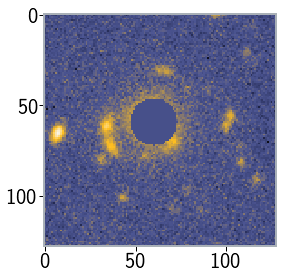

In [19]:
# check mask placement
dij = reconsrc.lens_map(mask=True)
dij = np.log(1+dij-dij.min())
plt.imshow(dij,
           #extent=lo.extent,
           cmap='gravic')


In [20]:
%%script false
# check coordinate shift
grid = np.array([np.sum(lo.theta(i)**2) for i in range(lo.naxis1*lo.naxis2)])
grid = grid.reshape((lo.naxis1, lo.naxis2))
plt.imshow(grid,
           # extent=lo.extent,
           cmap='gravic')
plt.colorbar()

In [21]:
# run projections
kw = dict(method='minres',
          use_psf=False,
          use_mask=True,
          use_filter=False,
          sigma2=sig2.copy(),
          cached=True)
wrad = 0.8

reconsrc.inv_proj_matrix(use_mask=False, r_max=3.5)
lns = reconsrc.lens_map(mask=True)
src = reconsrc.plane_map(**kw)
synth = reconsrc.reproj_map(from_cache=False, save_to_cache=False, **kw)
residmap = reconsrc.residual_map(nonzero_only=True, within_radius=wrad, from_cache=False, save_to_cache=False, **kw)
chi2 = reconsrc.reproj_chi2(reduced=False, nonzero_only=True, within_radius=wrad, from_cache=False, save_to_cache=False, **kw)
print("Chi2: {}".format(chi2))


Chi2: 1409.49804688


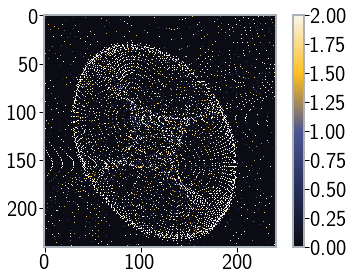

In [22]:
plt.imshow(src,
           #extent=lo.extent,
           cmap='gravic',
           vmin=0,
           vmax=2,
)
plt.colorbar()

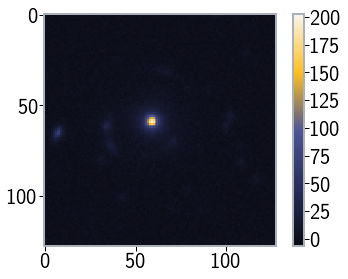

In [24]:
plt.imshow(np.flipud(ml[band].data),
           #extent=lo.extent,
           cmap='gravic',
           # vmin=0,
           # vmax=6,
           # vmax=15,
           # vmax=20,
)
plt.colorbar()

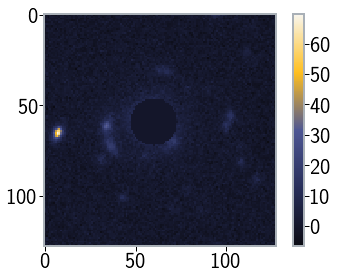

In [26]:
plt.imshow(lns,
           #extent=lo.extent,
           cmap='gravic',
           # vmin=0,
           # vmax=6,
           # vmax=15,
           # vmax=20,
)
plt.colorbar()

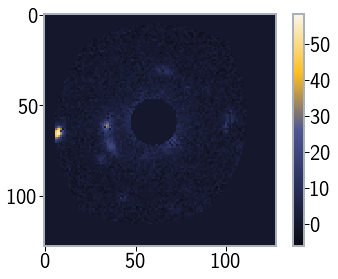

In [27]:
plt.imshow(synth,
           #extent=lo.extent,
           cmap='gravic',
           # vmin=0,
           # vmax=6,
           # vmax=15,
           # vmax=20,
)
plt.colorbar()

In [29]:
%%script false
import cPickle as pickle

with open('savestates/reconproj_{}.pkl'.format(band), 'wb') as f:
    pickle.dump([np.flipud(ml[band].data), src, synth], f)

In [31]:
import cPickle as pickle

lnss = []
srcs = []
synths = []
for ib in ['i', 'r', 'g']:
    with open('savestates/reconproj_{}.pkl'.format(ib), 'rb') as f:
        pkldta = pickle.load(f)
    lnss.append(pkldta[0])
    srcs.append(pkldta[1])
    synths.append(pkldta[2])


In [32]:
synths_norm = [0, 0, 0]
for i in range(3):
    synths_norm[i] = synths[i].copy()
    msk = synths[i] == 0
    synths_norm[i][msk] = lnss[i][msk]
rgblns = lupton_like(lnss[0], lnss[1], lnss[2], method='bluer')
rgbsrc = lupton_like(srcs[0], srcs[1], srcs[2], method='bluer')
rgbsynth = lupton_like(synths_norm[0], synths_norm[1], synths_norm[2], method='bluer')


In [33]:
%%script false
plt.imshow(rgblns)
plt.show()
plt.imshow(rgbsynth)
plt.show()


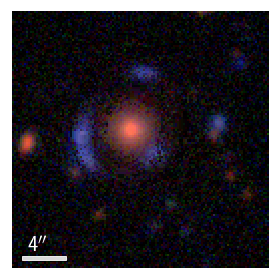

In [34]:
plt.imshow(rgbsynth, extent=lo.extent)

plot_scalebar(lo.extent[1],
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'composite_synth_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)



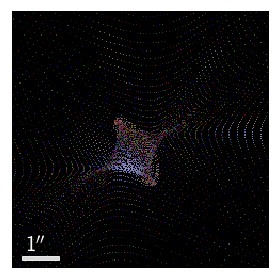

In [35]:
plt.imshow(np.sqrt(rgbsrc), extent=reconsrc.src_extent)

plot_scalebar(3.5,
              length=1,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'composite_src_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)

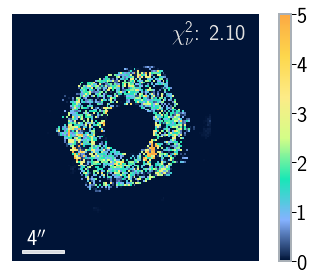

In [60]:
resids = []
red_chi2s = []
for i in range(3):

    dta = lnss[i].copy()
    fit = synths[i].copy()
    dta[fit == 0] = 0

    sig2 = 1 * np.abs(lnss[i][:])
    sig2[sig2 == 0] = sig2[sig2 != 0].min()

    r = (dta - fit)**2/sig2
    dof = float(np.prod(r.shape)) - float(np.sum(r == 0)) - (float(np.prod(srcs[i].shape)) - float(np.sum(srcs[i] == 0)))
    red_chi2s.append(2*np.sum(r) / dof)
    resids.append(np.sqrt(r).copy())

resids = np.sum(resids, axis=0)

# plotting
plt.imshow(resids, extent=lo.extent, cmap='vilux', vmin=0, vmax=5)
plt.text(0.95, 0.88, r"$\chi^{2}_{\nu}$: "+"{:2.2f}".format(np.average(red_chi2s)), color='#DEDEDE',
         horizontalalignment='right', transform=plt.gca().transAxes, fontsize=22)
plt.colorbar()

plot_scalebar(lo.extent[1],
              length=4,
              position='bottom left',
              padding=(0.08, 0.06),
              barheight=0.03,
              length_scale=1.,
              color='white',
              fontsize=22)
# plot_labelbox(lm.obj_name,
#               position='bottom right',
#               fontsize=20,
#               color='white')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'composite_resids_SW05.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)

## Stellar light model

In [37]:
lo = ml['i'] # .deepcopy()
ml['i'].data = np.flipud(ml['i'].data[:])
c = lo.center.xy[::-1] + np.array([-4, -5])
msk = ml['i'].roi.select_circle(center=c, radius=13)
ml['i'].origin = c
print c

[60.00000000002137 59.00000000000591]


In [38]:
lsampler = LightSampler.from_gleamobj(ml, verbose=0)
lsampler.parameters = {'x': c[1], 'y': c[0]-1}
priors = lsampler.model.priors
priors[0] = [c[1]-4, c[1]+4]
priors[1] = [c[0]-4, c[0]+4]
lsampler.model.priors = priors
# lsampler.fixed = 'x', 'y'
lsampler.fixed = 'c_0',
print lsampler.__v__


# sampler.parspace_plot(show=1)

data                	[[ 0.5156907   -3.2366512   -2.767426    ...  1.6496501    0.5278613   -1.401684   ]
 [ 0.13868862  -0.7064841   -4.109621    ... -0.023127437 -0.274463     1.203038   ]
 [-1.6882833    1.2934761   -0.80168515  ... -3.2631068   -3.1014037    1.7210591  ]
 ...
 [ 0.19152077  -1.8641968   -0.912929    ... -1.4370914   -2.234941    -1.0258553  ]
 [ 4.7068024    1.5401719   -0.057964623 ...  1.2311332    2.4986756    1.0916483  ]
 [-0.82116497  -0.21374848  -2.6725368   ...  0.97291994  -1.1987534   -0.34996095 ]]
model_cls           	<class 'gleam.model.sersic.Sersic'>
model               	<gleam.model.sersic.Sersic object at 0x7f8d6c08a050>
mask                	[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
parameters          	{'phi': 0.0, 'e': 0.0, 'r_

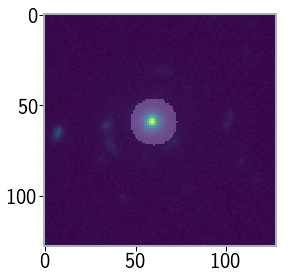

In [39]:
plt.imshow(lsampler.data)
plt.imshow(lsampler.mask, cmap='bone', alpha=0.2)


In [40]:
%%script false
# Run MCMC parameter estimation
lsampler.run(n_walkers=300, burn_in=50, mcmc_steps=500)
lsampler.ensemble_average()
print lsampler.parameters
lsampler.parspace_plot()


In [41]:
best_pars = {'x': 59.02099903821723, 'y': 58.9346344410624,
             'I_0': 29.49507094039217,
             'n': 1.4974741188141885, 'c_0': 0.0,
             'e': 0.11663097506313133,
             'phi': 3.464562637198838+90,
             'r_s': 8.976805452180514 * (100./128),
}
lsampler.parameters = best_pars
print lsampler.parameters


{'phi': 93.46456263719884, 'e': 0.11663097506313133, 'r_s': 7.013129259516027, 'n': 1.4974741188141885, 'c_0': 0.0, 'y': 58.9346344410624, 'x': 59.02099903821723, 'I_0': 29.49507094039217}


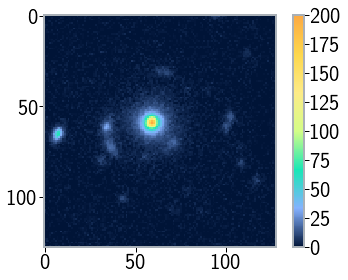

In [42]:
dta = lsampler.data
plt.imshow(dta, cmap=gcl.GLEAMcmaps.vilux, vmin=0, vmax=200)
plt.colorbar()


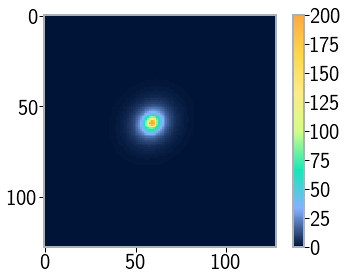

In [45]:
ml['i'].light_model = lsampler.model
lightmdl = ml['i'].light_model['sersic']
lightmdl.Nx = 128
lightmdl.Ny = 128
mdl = lightmdl.get_map()
# plt.imshow(np.log10(1+mdl-mdl.min()), cmap=gcl.GLEAMcmaps.vilux, vmin=0)
plt.imshow(mdl, cmap=gcl.GLEAMcmaps.vilux, vmin=0, vmax=200)
plt.colorbar()


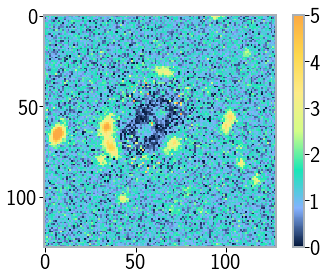

In [46]:
resid = lsampler.residual_map(squared=False)
plt.imshow(resid, cmap=gcl.GLEAMcmaps.vilux, vmin=0, vmax=5)
plt.colorbar()


## Dark matter mass map

In [47]:
ssampler = StarSampler.from_gleamobj(ml, verbose=0)


In [48]:
m_stel = ssampler.chabrier_estimate(band_data=[l.data for l in ml])
print(m_stel)
ml['i'].stel_mass = m_stel[1]  # middle estimate
print "{:e}".format(m_stel[1])


[4.8697261659755386e+10 2.2417862007407718e+11 8.0193446404932568e+11]
2.241786e+11


In [49]:
# from MCMC (hardcoded, resampling would take too long)
m_stel = [3.04e+11 - 5*0.22e+11, 3.04e+11, 3.04e+11 + 5*0.22e+11]
print(m_stel)
ml['i'].stel_mass = m_stel[1]
print "{:e}".format(m_stel[1])

# with open('savestates/stelM_012771.pkl') as f:
#     samples = pickle.load(f)
# print samples.shape

# smpls_mean = np.median(samples, axis=0)
# print smpls_mean


[194000000000.0, 304000000000.0, 414000000000.0]
3.040000e+11


In [57]:
# from gleam.utils.lensing import integrate_map
m_stel_map = ml['i'].stel_map.copy()
print "{:e}".format(np.sum(m_stel_map))

m_stel_map = StarSampler.resample_map(ml['i'].stel_map.copy(), ml['i'].extent,
                                      lm.kappa_grid(refined=True).shape, lm.extent)

# plt.imshow(m_stel_map, cmap='phoenix', extent=lm.extent, vmax=3e+9)
# plt.colorbar()


3.040000e+11


In [58]:
stel_map = StarSampler.resample_map(ml['i'].stel_map.copy(), ml['i'].extent,
                                    lm.kappa_grid(refined=True).shape, lm.extent)
lens_map = lm.sigma_grid(model_index=-1, refined=True) * lm.pixel_size**2
var_map = lm.variance_grid(refined=True, normalize=False,
                           factor=lm.kappa/lens_map*lm.pixel_size**2)

# print stel_map.shape, lens_map.shape
print "Stel. mass: {:e}".format(np.sum(stel_map))
print "Lens. mass: {:e}".format(np.sum(lens_map))


Stel. mass: 1.992447e+11
Lens. mass: 1.128579e+13


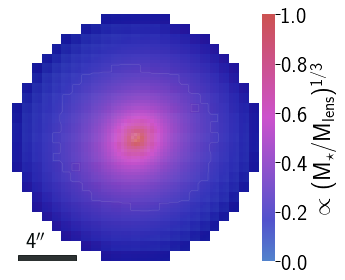

In [77]:
kw = dict(ef=.3, eA=.1, eDelta=.4, color_offset=(0.6, 0.4))
clist = stellar_fraction_cbar(error=0.4, A=0.8, color_offset=(0.6, 0.4), bins=500)
cm = mpl.colors.ListedColormap(clist) 

rgba = stellar_fraction_map(stel_map, lens_map, error=var_map,
                            center_fix=2, alpha_mask=True, **kw)

plt.imshow(rgba, extent=lm.extent, cmap=cm)

cbar = plt.colorbar(pad=0.01)
cbar.set_label(r'$\propto$ (M$_\star$/M$_\mathsf{lens}$)$^{1/3}$',
               fontsize=24)
cbar.outline.set_visible(False)

plt.contour(lens_map, extent=lm.extent, levels=[lm.kappa*lm.pixel_size**2],
            colors=gcl.white, linewidths=0.5, alpha=.2, origin='upper')
plot_scalebar(lm.maprad, length=4, position='bottom left',
              padding=(0.05, 0.0), barheight=0.05,
              length_scale=1., color=gcl.black, fontsize=22)

plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()

savename = 'lightvsdark.{}'.format(extension)
plt.savefig(os.path.join('plots', savename),
            transparent=True, bbox_inches='tight', pad_inches=0)
